In [1]:
import numpy as np

In [8]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1],])

D = np.array([[0],[0],[0],[1]])

In [9]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))
def softmax(a) :
    return np.exp(a) / np.sum(np.exp(a))
def calc_output(W, x) :
    v = np.matmul(W, x)
    y = sigmoid(v)
    return y
def calc_error(d, y) :
    e = d - y
    delta = y*(1-y)*e
    return delta
def delta_GD(W, X, D, alpha) :
    for k in range(4) :
        x = X[k, :].T
        d = D[k]

        y = calc_output(W, x)
        delta = calc_error(d, y)

        dW = alpha*delta*x
        W = W + dW

    return W, delta

In [12]:
W = 2*np.random.random((1,3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000) :
    W, delta = delta_GD(W, X, D, alpha)
    hist_loss.append(delta)
    hist_W.append(W)

    if epoch % 100 == 0 :
        print(W)

[[-0.70901092 -0.02609776  0.23926361]]
[[ 2.55697978  2.52084372 -3.86799557]]
[[ 3.42043762  3.40071417 -5.19000258]]
[[ 3.92820878  3.91517802 -5.96240739]]
[[ 4.28393837  4.27430963 -6.50129015]]
[[ 4.55618595  4.54858729 -6.91269233]]
[[ 4.7759966   4.76973814 -7.24432481]]
[[ 4.95994617  4.95463519 -7.5215456 ]]
[[ 5.11788594  5.11327868 -7.75937617]]
[[ 5.25613067  5.25206586 -7.96742197]]


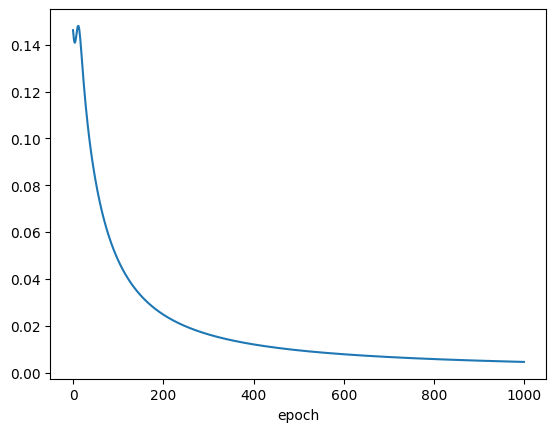

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show()

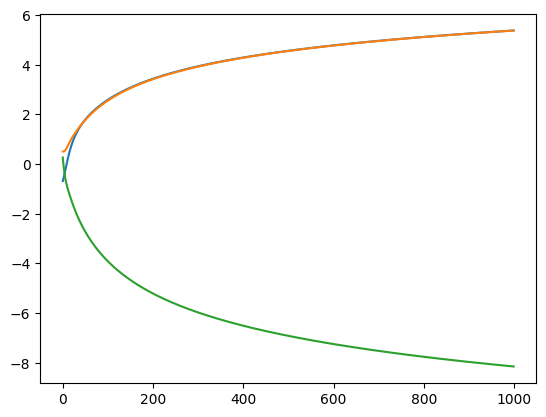

In [6]:
plt.plot(np.array(hist_W).reshape(-1,3));

In [7]:
N = 3
for k in range(N) :
    x = X[k, :].T
    y = calc_output(W, x)

    print(y)

[0.00028711]
[0.05852962]
[0.05872982]


In [18]:
def calc_output(W1, W2, x) :
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y =  sigmoid(v)
    return y, y1

def calc_delta(d, y) :
    e = d - y
    delta = y*(1-y)*e
    return delta

def calc_delta1(W2, delta, y1) :
    e1 = np.matmul(W2.T, delta)
    delta1 = y*(1-y)*e1
    return delta1

In [29]:
def backprop_XOR(W1, W2, X, D, alpha) :
    for k in range(4) :
        x = X[k, :].T
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
    return W1, W2

In [49]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1],])

D = np.array([[0],[1],[1],[0]])

W1 = 2*np.random.random((4,3)) - 1
W2 = 2*np.random.random((1,4)) - 1

In [39]:
alpha = 0.9
for epoch in range(10000) :
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [50]:
N = 4
for k in range(4) :
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[0.51311526]
[0.54976857]
[0.43609814]
[0.46731797]
